In [1]:
import numpy as np
np.random.seed(13)

from keras.models import Model
from keras.layers import Dense, Embedding, GRU, Input, Bidirectional
from keras.preprocessing.text import Tokenizer, base_filter
from keras.preprocessing import sequence
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot

from IPython.display import SVG
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Using Theano backend.


In [2]:
tweets = []
labels = []
with open("./data/tweets.tsv") as f:
    for l in f:
        tweet, label = l.strip().split("\t")
        tweets.append(" ".join(list(tweet)))
        labels.append(int(label))
maxlen = 140

tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(tweets)
X_train = tokenizer.texts_to_sequences(tweets)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
Y_train = np_utils.to_categorical(labels, len(set(labels)))
V = len(tokenizer.word_index) + 1

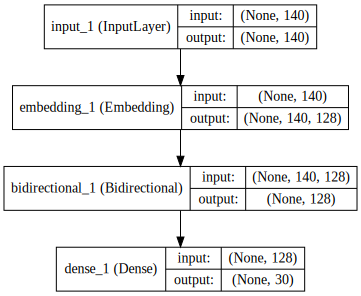

In [3]:
l2_coef = 0.001
tweet = Input(shape=(maxlen,), dtype='int32')
x = Embedding(V, 128, input_length=maxlen, W_regularizer=l2(l=l2_coef))(tweet)
x = Bidirectional(layer=GRU(128, return_sequences=False, 
                            W_regularizer=l2(l=l2_coef),
                            b_regularizer=l2(l=l2_coef),
                            U_regularizer=l2(l=l2_coef)),
                  merge_mode='sum')(x)
x = Dense(len(set(labels)), W_regularizer=l2(l=l2_coef), activation="softmax")(x)

tweet2vec = Model(input=tweet, output=x)

tweet2vec.compile(loss='categorical_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])

SVG(model_to_dot(tweet2vec, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
tweet2vec.fit(X_train, Y_train, nb_epoch=10, batch_size=32, validation_split=0.1)

Train on 337 samples, validate on 38 samples
Epoch 1/10
337/337 [==============================] - 4s - loss: 4.9169 - acc: 0.0801 - val_loss: 3.3234 - val_acc: 0.0000e+00
Epoch 2/10
337/337 [==============================] - 4s - loss: 4.5289 - acc: 0.1128 - val_loss: 3.2595 - val_acc: 0.1579
Epoch 3/10
337/337 [==============================] - 4s - loss: 4.2693 - acc: 0.1395 - val_loss: 3.3700 - val_acc: 0.0263
Epoch 4/10
337/337 [==============================] - 4s - loss: 3.9784 - acc: 0.1840 - val_loss: 3.1396 - val_acc: 0.1053
Epoch 5/10
337/337 [==============================] - 4s - loss: 3.8037 - acc: 0.1869 - val_loss: 3.0821 - val_acc: 0.1316
Epoch 6/10
337/337 [==============================] - 4s - loss: 3.5660 - acc: 0.2077 - val_loss: 3.2558 - val_acc: 0.0526
Epoch 7/10
337/337 [==============================] - 4s - loss: 3.4063 - acc: 0.2136 - val_loss: 3.1829 - val_acc: 0.0789
Epoch 8/10
337/337 [==============================] - 4s - loss: 3.2654 - acc: 0.2285 - va

## ref http://arxiv.org/abs/1605.03481